# Backtesting

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Union, Tuple, List, Any, Optional
import plotly.graph_objects as go


import pickle
with open('/content/drive/MyDrive/Math 628/data/ticker_data_dict.pkl', 'rb') as file:
    loaded_dict = pickle.load(file)
appl = loaded_dict['AAPL']

In [ ]:
cd /content/drive/MyDrive/Teaching/Math 628 - Fall 2025/week 6/

/content/drive/MyDrive/Teaching/Math 628 - Fall 2025/week 6


In [ ]:
from Labeling import *

In [ ]:
prices = appl['Close']
volatility = daily_volatility_with_log_returns(prices, 30)
filter_threshold = 1.5
moelcules = cusum_filter_events_dynamic_threshold(np.log(prices), filter_threshold * volatility)
vertical_barriers = vertical_barrier(prices, moelcules, 20)


triple_barrier_events ,tt = meta_events(prices, vertical_barriers.index, [1, 1], volatility, 0, 1, vertical_barriers)
labels = meta_labeling(triple_barrier_events, prices)

In [ ]:
labels

,End Time,Return of Label,Label
2005-11-17,2005-11-22,0.030998,1.0
2005-11-22,2005-11-25,0.042394,1.0
2005-11-25,2005-11-29,-0.017883,-1.0
2005-12-01,2005-12-06,0.034217,1.0
2005-12-08,2005-12-14,-0.027942,-1.0
...,...,...,...
2025-07-22,2025-07-29,-0.014599,-1.0
2025-07-30,2025-08-01,-0.031906,-1.0
2025-08-01,2025-08-06,0.053711,1.0
2025-08-06,2025-08-07,0.031794,1.0


In [ ]:
apple_new = pd.merge(appl, labels, left_index=True, right_index=True)

In [ ]:
apple_new

,Close,High,Low,Open,Volume,Ticker,Sector,SMA_20,SMA_50,EMA_20,...,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return,End Time,Return of Label,Label
2005-11-17,1.936898,1.977725,1.928792,1.969019,676205600,AAPL,Information Technology,1.785687,1.657639,1.796606,...,0.076836,0.066418,-0.009948,0.067083,0.021911,-0.002385,0.000938,2005-11-22,0.030998,1.0
2005-11-22,1.996938,2.004143,1.936898,1.946504,540282400,AAPL,Information Technology,1.826949,1.683162,1.839943,...,0.084044,0.073691,0.035531,0.009334,0.000938,-0.009948,0.012768,2005-11-25,0.042394,1.0
2005-11-25,2.081596,2.087599,2.026358,2.031162,395012800,AAPL,Information Technology,1.862988,1.705359,1.878012,...,0.094740,0.080127,0.046669,0.012768,0.035531,0.009334,0.006280,2005-11-29,-0.017883,-1.0
2005-12-01,2.149441,2.153343,2.065685,2.069887,812893200,AAPL,Information Technology,1.934542,1.746204,1.945480,...,0.102970,0.091865,0.076288,-0.005762,-0.030701,0.006280,0.018665,2005-12-06,0.034217,1.0
2005-12-08,2.223889,2.226592,2.179460,2.197472,790479200,AAPL,Information Technology,2.029540,1.808088,2.047126,...,0.119487,0.108049,0.002202,-0.001692,0.039799,-0.014387,0.004216,2005-12-14,-0.027942,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-22,214.156952,214.706331,211.989414,212.898386,46404100,AAPL,Information Technology,208.441438,204.775798,208.708340,...,2.490489,2.195740,0.001679,0.001147,0.001030,-0.000125,-0.000217,2025-07-29,-0.014599,-1.0
2025-07-30,208.813019,212.149229,207.484525,211.659779,45512500,AAPL,Information Technology,211.399581,205.157964,210.270732,...,1.907262,2.310010,-0.001974,-0.002437,0.000148,0.000105,-0.001330,2025-08-01,-0.031906,-1.0
2025-08-01,202.150589,213.337890,201.271582,210.630955,104434500,AAPL,Information Technology,210.598491,205.044294,209.244394,...,0.651983,1.839928,-0.004747,-0.001330,-0.001974,-0.002437,0.000901,2025-08-06,0.053711,1.0
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100,AAPL,Information Technology,210.020148,205.459822,208.560570,...,0.094997,0.915355,0.009348,-0.000398,0.000901,-0.004747,0.005838,2025-08-07,0.031794,1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)

# Assume apple_new is a pre-loaded DataFrame with your data
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI',
                    'MACD', 'MACD_Signal', 'Return', 'Lag_Return_1',
                    'Lag_Return_2', 'Lag_Return_3']

# Filter the dataset to include only rows with label -1 and 1
apple_new = apple_new[apple_new['Label'].isin([-1, 1])]

X = apple_new[selected_columns]
y = apple_new['Label'].values

In [ ]:
apple_new

,Close,High,Low,Open,Volume,Ticker,Sector,SMA_20,SMA_50,EMA_20,...,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return,End Time,Return of Label,Label
2005-11-17,1.936898,1.977725,1.928792,1.969019,676205600,AAPL,Information Technology,1.785687,1.657639,1.796606,...,0.076836,0.066418,-0.009948,0.067083,0.021911,-0.002385,0.000938,2005-11-22,0.030998,1.0
2005-11-22,1.996938,2.004143,1.936898,1.946504,540282400,AAPL,Information Technology,1.826949,1.683162,1.839943,...,0.084044,0.073691,0.035531,0.009334,0.000938,-0.009948,0.012768,2005-11-25,0.042394,1.0
2005-11-25,2.081596,2.087599,2.026358,2.031162,395012800,AAPL,Information Technology,1.862988,1.705359,1.878012,...,0.094740,0.080127,0.046669,0.012768,0.035531,0.009334,0.006280,2005-11-29,-0.017883,-1.0
2005-12-01,2.149441,2.153343,2.065685,2.069887,812893200,AAPL,Information Technology,1.934542,1.746204,1.945480,...,0.102970,0.091865,0.076288,-0.005762,-0.030701,0.006280,0.018665,2005-12-06,0.034217,1.0
2005-12-08,2.223889,2.226592,2.179460,2.197472,790479200,AAPL,Information Technology,2.029540,1.808088,2.047126,...,0.119487,0.108049,0.002202,-0.001692,0.039799,-0.014387,0.004216,2005-12-14,-0.027942,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-22,214.156952,214.706331,211.989414,212.898386,46404100,AAPL,Information Technology,208.441438,204.775798,208.708340,...,2.490489,2.195740,0.001679,0.001147,0.001030,-0.000125,-0.000217,2025-07-29,-0.014599,-1.0
2025-07-30,208.813019,212.149229,207.484525,211.659779,45512500,AAPL,Information Technology,211.399581,205.157964,210.270732,...,1.907262,2.310010,-0.001974,-0.002437,0.000148,0.000105,-0.001330,2025-08-01,-0.031906,-1.0
2025-08-01,202.150589,213.337890,201.271582,210.630955,104434500,AAPL,Information Technology,210.598491,205.044294,209.244394,...,0.651983,1.839928,-0.004747,-0.001330,-0.001974,-0.002437,0.000901,2025-08-06,0.053711,1.0
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100,AAPL,Information Technology,210.020148,205.459822,208.560570,...,0.094997,0.915355,0.009348,-0.000398,0.000901,-0.004747,0.005838,2025-08-07,0.031794,1.0


In [ ]:
from itertools import combinations
from sklearn.metrics import mean_squared_error
def combinatorial_purged_cv_indices(n_samples, n_partitions=5, k=1, purge_size=0):
    """
    Generate train-test indices for Combinatorial Purged Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_partitions (int): Number of contiguous partitions to split the data into.
    - k (int): Number of partitions to select for the test set.
    - purge_size (int): Number of samples to exclude before and after each test partition.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    # 1. Partition the data contiguously
    partition_size = n_samples // n_partitions
    remainder = n_samples % n_partitions
    partition_boundaries = []
    start_idx = 0
    for i in range(n_partitions):
        size = partition_size + (1 if i < remainder else 0)
        end_idx = start_idx + size
        partition_boundaries.append((start_idx, end_idx))
        start_idx = end_idx

    # 2. Generate all combinations of partitions of size k for the test set
    partition_indices = range(n_partitions)
    test_combos = list(combinations(partition_indices, k))

    folds = []
    all_indices = np.arange(n_samples)
    for combo in test_combos:
        # Build test indices from the selected partitions
        test_indices_list = []
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            test_indices_list.append(np.arange(start, end))
        test_indices = np.concatenate(test_indices_list)

        # Start with all indices; remove test indices
        train_mask = np.ones(n_samples, dtype=bool)
        train_mask[test_indices] = False

        # 3. Purge a window before and after each test partition
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            purge_start = max(0, start - purge_size)
            purge_end = min(n_samples, end + purge_size)
            train_mask[purge_start:purge_end] = False

        train_idx = np.where(train_mask)[0]
        folds.append((train_idx, test_indices))

    return folds


In [ ]:
def compute_pl_for_stratgy(data, features , model , threshold = 0.55):
  label = model.predict(features)
  prob = np.max( model.predict_proba(features) , axis = 1)
  new_data = data.loc[features.index]
  new_data['label'] = label
  new_data['prob'] = prob
  new_data = new_data[new_data['prob'] > threshold]
  invest_length = (new_data['End Time'] - new_data.index).astype(int)
  returns =  new_data['Return of Label'] * new_data['label'] * new_data['prob'] / invest_length

  return returns

In [ ]:
n_samples = X.shape[0]

n_partitions = 8
k = 2
purge_size = 10


folds = combinatorial_purged_cv_indices(n_samples, n_partitions, k, purge_size)


sharp_ratio_scores = []
returns_scores = []

for fold, (train_idx, test_idx) in enumerate(folds, 1):
    # Extract training and test data for this fold.
    X_train, y_train = X.iloc[train_idx , : ], y[train_idx]
    X_test, y_test = X.iloc[test_idx, : ], y[test_idx]


    model = RandomForestClassifier(n_estimators=100, class_weight='balanced' , random_state=42)
    model.fit(X_train, y_train)
    returns = compute_pl_for_stratgy(apple_new, X_test, model)
    returns_scores.append(returns.values)
    sr = np.mean(returns)/np.std(returns) * np.sqrt(252)
    sharp_ratio_scores.append(sr)
    print(f"Fold {fold} - Sharp Ratio: {sr:.4f}")



Fold 1 - Sharp Ratio: 2.1203
Fold 2 - Sharp Ratio: 1.7646
Fold 3 - Sharp Ratio: 1.1151
Fold 4 - Sharp Ratio: 1.3591
Fold 5 - Sharp Ratio: 1.5252
Fold 6 - Sharp Ratio: 2.1883
Fold 7 - Sharp Ratio: 1.8585
Fold 8 - Sharp Ratio: 0.6807
Fold 9 - Sharp Ratio: 1.2183
Fold 10 - Sharp Ratio: 0.9194
Fold 11 - Sharp Ratio: 1.9721
Fold 12 - Sharp Ratio: 1.2315
Fold 13 - Sharp Ratio: 1.3952
Fold 14 - Sharp Ratio: 0.3511
Fold 15 - Sharp Ratio: -0.4323
Fold 16 - Sharp Ratio: 0.7680
Fold 17 - Sharp Ratio: 1.0328
Fold 18 - Sharp Ratio: 0.7688
Fold 19 - Sharp Ratio: 0.5478
Fold 20 - Sharp Ratio: 0.5161
Fold 21 - Sharp Ratio: 0.5436
Fold 22 - Sharp Ratio: 0.1380
Fold 23 - Sharp Ratio: -0.7601
Fold 24 - Sharp Ratio: 0.8348
Fold 25 - Sharp Ratio: 0.2503
Fold 26 - Sharp Ratio: 0.9108
Fold 27 - Sharp Ratio: 0.0099
Fold 28 - Sharp Ratio: 1.7279


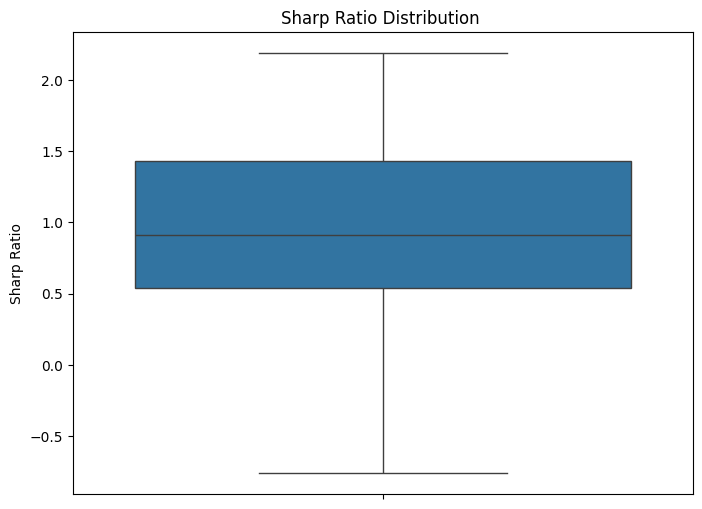

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sharp_ratio_scores)
plt.ylabel('Sharp Ratio')
plt.title('Sharp Ratio Distribution ')
plt.show()


In [ ]:
all_returns = np.concatenate(returns_scores)

np.mean(all_returns)/np.std(all_returns) * np.sqrt(252)


np.float64(1.0214887200422813)

In [ ]:
def compute_concurrency(data :pd.DataFrame ,
                        events: pd.DataFrame,
                        end_time_col: str = 'end_time',
                       ) -> pd.DataFrame:

    # Ensure the DataFrame is sorted by index (start time)
    result = data.copy()
    result['n_concurent'] = 0
    for index, row in events.iterrows():
      result.loc[index : row[end_time_col], 'n_concurent'] += 1

    return result

In [ ]:
labels

,End Time,Return of Label,Label
2005-11-17,2005-11-22,0.030998,1.0
2005-11-22,2005-11-25,0.042394,1.0
2005-11-25,2005-11-29,-0.017883,-1.0
2005-12-01,2005-12-06,0.034217,1.0
2005-12-08,2005-12-14,-0.027942,-1.0
...,...,...,...
2025-07-22,2025-07-29,-0.014599,-1.0
2025-07-30,2025-08-01,-0.031906,-1.0
2025-08-01,2025-08-06,0.053711,1.0
2025-08-06,2025-08-07,0.031794,1.0


In [ ]:
compute_concurrency(appl , labels , 'End Time').head(20)

,Close,High,Low,Open,Volume,Ticker,Sector,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return,n_concurent
Date,,,,,,,,,,,,,,,,,,,,
2005-11-14,1.844736,1.860646,1.828525,1.847438,369933200,AAPL,Information Technology,1.742968,1.630927,1.753052,1.658326,65.688283,0.065819,0.059969,-0.002385,0.009651,0.029890,0.005964,0.021911,0
2005-11-15,1.869653,1.893669,1.845036,1.849239,536841200,AAPL,Information Technology,1.758083,1.639020,1.764157,1.666613,67.775584,0.067005,0.061376,0.021911,-0.002385,0.009651,0.029890,0.067083,0
2005-11-16,1.949806,1.953108,1.893969,1.895770,784515200,AAPL,Information Technology,1.773108,1.648789,1.781838,1.677719,73.384624,0.073565,0.063814,0.067083,0.021911,-0.002385,0.009651,-0.009948,0
2005-11-17,1.936898,1.977725,1.928792,1.969019,676205600,AAPL,Information Technology,1.785687,1.657639,1.796606,1.687883,71.234139,0.076836,0.066418,-0.009948,0.067083,0.021911,-0.002385,0.000938,1
2005-11-18,1.938099,1.964217,1.932396,1.960614,524960800,AAPL,Information Technology,1.799046,1.665594,1.810081,1.697695,71.318354,0.078619,0.068858,0.000938,-0.009948,0.067083,0.021911,0.009334,1
2005-11-21,1.950107,1.957011,1.912881,1.945904,511711200,AAPL,Information Technology,1.811309,1.673736,1.823417,1.707594,72.194821,0.080078,0.071102,0.009334,0.000938,-0.009948,0.067083,0.035531,1
2005-11-22,1.996938,2.004143,1.936898,1.946504,540282400,AAPL,Information Technology,1.826949,1.683162,1.839943,1.718941,75.357601,0.084044,0.073691,0.035531,0.009334,0.000938,-0.009948,0.012768,2
2005-11-23,2.014650,2.040767,2.002042,2.007745,485853200,AAPL,Information Technology,1.842079,1.693669,1.856582,1.730537,76.448762,0.087607,0.076474,0.012768,0.035531,0.009334,0.000938,0.046669,1
2005-11-25,2.081596,2.087599,2.026358,2.031162,395012800,AAPL,Information Technology,1.862988,1.705359,1.878012,1.744304,80.045237,0.094740,0.080127,0.046669,0.012768,0.035531,0.009334,0.006280,2


In [ ]:
def compute_pl_for_stratgy(data_row,  labeled_data , features , model , threshold = 0.55):
  label = model.predict(features)
  prob = np.max( model.predict_proba(features) , axis = 1)
  new_data = labeled_data.loc[features.index]
  new_data['label'] = label
  new_data['prob'] = prob
  new_data = new_data[new_data['prob'] > threshold]
  data_row['Strategy_return'] = 0.0
  for index, row in new_data.iterrows():
    size  =  row['label'] * row['prob']
    data_row.loc[index : row['End Time'],'Strategy_return' ]  += data_row.loc[index , 'Return'] * 1. / data_row.loc[index , 'n_concurent']  * size

  return data_row['Strategy_return']


In [ ]:
n_samples = X.shape[0]

n_partitions = 8
k = 2
purge_size = 10


folds = combinatorial_purged_cv_indices(n_samples, n_partitions, k, purge_size)
data = compute_concurrency(appl , labels , 'End Time')

sharp_ratio_scores = []
returns_scores = []

for fold, (train_idx, test_idx) in enumerate(folds, 1):
    # Extract training and test data for this fold.
    X_train, y_train = X.iloc[train_idx , : ], y[train_idx]
    X_test, y_test = X.iloc[test_idx, : ], y[test_idx]

    # Fit the model using XGBRegressor.
    model = RandomForestClassifier(n_estimators=100, class_weight='balanced' , random_state=42)
    model.fit(X_train, y_train)
    returns = compute_pl_for_stratgy(data, apple_new , X_test, model).loc[X_test.index[0]: ]

    returns_scores.append(returns.values)
    sr = np.mean(returns)/np.std(returns) * np.sqrt(252)
    sharp_ratio_scores.append(sr)
    print(f"Fold {fold} - Sharp Ratio: {sr:.4f}")



Fold 1 - Sharp Ratio: 2.1896
Fold 2 - Sharp Ratio: 1.4309
Fold 3 - Sharp Ratio: 1.3363
Fold 4 - Sharp Ratio: 1.5305
Fold 5 - Sharp Ratio: 1.4735
Fold 6 - Sharp Ratio: 1.4874
Fold 7 - Sharp Ratio: 1.4354
Fold 8 - Sharp Ratio: 0.9369
Fold 9 - Sharp Ratio: 1.4596
Fold 10 - Sharp Ratio: 1.5992
Fold 11 - Sharp Ratio: 1.1656
Fold 12 - Sharp Ratio: 0.7300
Fold 13 - Sharp Ratio: 1.1803
Fold 14 - Sharp Ratio: 3.4081
Fold 15 - Sharp Ratio: 0.9520
Fold 16 - Sharp Ratio: 2.1367
Fold 17 - Sharp Ratio: 1.6094
Fold 18 - Sharp Ratio: 0.5026
Fold 19 - Sharp Ratio: 2.2776
Fold 20 - Sharp Ratio: 2.6480
Fold 21 - Sharp Ratio: 2.0954
Fold 22 - Sharp Ratio: 1.1521
Fold 23 - Sharp Ratio: 1.1985
Fold 24 - Sharp Ratio: 0.6930
Fold 25 - Sharp Ratio: 0.4474
Fold 26 - Sharp Ratio: 1.5883
Fold 27 - Sharp Ratio: 0.5843
Fold 28 - Sharp Ratio: -0.4198


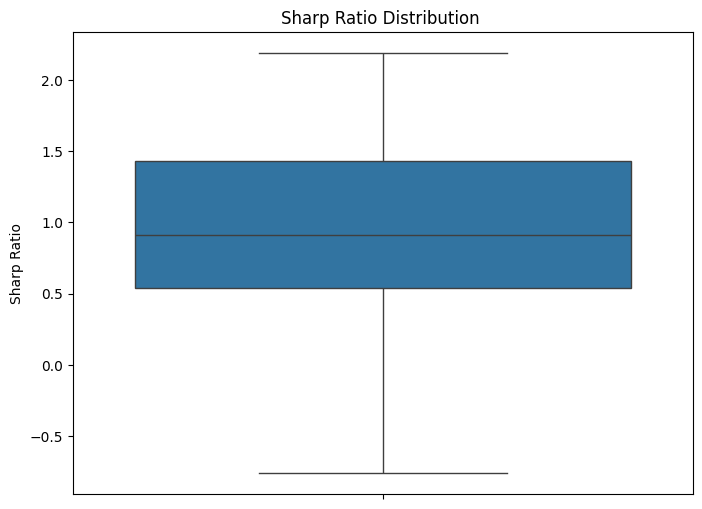

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sharp_ratio_scores)
plt.ylabel('Sharp Ratio')
plt.title('Sharp Ratio Distribution ')
plt.show()


# Deflated Sharp Ratio

## 1. Sampling Statistics of the Sharpe Ratio (Lo)

Assume i.i.d. returns with mean $\mu$ and standard deviation $\sigma$ and Sharpe $SR=\mu/\sigma$.
For $T$ observations the sample Sharpe $\hat{SR}$ is asymptotically normal

$$
\sqrt{T}(\hat{SR}-SR)\xrightarrow{d}Z
$$

$$
Z \text{ is Normal with mean } 0 \text{ and variance } 1+\tfrac{1}{2}SR^2
$$

$$
\operatorname{Var}(\hat{SR}) \approx \frac{1+\tfrac{1}{2}SR^2}{T}
$$

$$
\operatorname{se}(\hat{SR}) \approx \sqrt{\frac{1+\tfrac{1}{2}SR^2}{T-1}}
$$

---

## 2. Dropping Normality (Mertens)

If returns have standardized skewness $\gamma_3$ and kurtosis $\gamma_4$ with $\gamma_4=3$ under normality a delta method derivation gives

$$
\operatorname{Var}(\hat{SR}) \approx \frac{1 - \gamma_3 SR + \tfrac{\gamma_4-1}{4}SR^2}{T}
$$

$$
\operatorname{se}(\hat{SR}) \approx \sqrt{\frac{1 - \gamma_3 SR + \tfrac{\gamma_4-1}{4}SR^2}{T-1}}
$$

This widens or narrows uncertainty according to skew and tail heaviness.

---

## 3. The Probabilistic Sharpe Ratio (PSR)

Given a benchmark $SR^*$ often $0$ the PSR is the probability that the true Sharpe exceeds $SR^*$

$$
\mathrm{PSR}(SR^*) =
\Phi\left(
\frac{\hat{SR}-SR^*}{\sqrt{\bigl(1-\hat{\gamma}_3 \hat{SR} + \tfrac{\hat{\gamma}_4-1}{4}\hat{SR}^{2}\bigr)/(T-1)}}
\right)
$$

Here $\Phi$ is the standard Normal CDF and $\hat{\gamma}_3$ and $\hat{\gamma}_4$ are sample skewness and kurtosis.

---

## 4. Minimum Track Record Length (MinTRL)

For a target confidence $1-\alpha$ that $SR>SR^*$ solve the PSR expression for $T$.
Using sample estimates this yields

$$
\widehat{\mathrm{MinTRL}} = 1 +
\left(1 - \hat{\gamma}_3 \hat{SR} + \frac{\hat{\gamma}_4-1}{4}\hat{SR}^2\right)
\left(\frac{Z_\alpha}{\hat{SR}-SR^*}\right)^2
$$

with $Z_\alpha=\Phi^{-1}(1-\alpha)$

---

## 5. Distribution of the Maximum of Normal Draws

If you run $N$ independent trials whose Sharpe estimates are approximately normal with cross trial mean $\overline{\hat{SR}}$ and standard deviation $\hat{\sigma}_{\hat{SR}}$ the expected maximum rises with $N$.
An approximation from extreme value considerations is

$$
\mathbb{E}\bigl[\max_{1\le i\le N}\hat{SR}_i\bigr]
\approx
\overline{\hat{SR}} +
\hat{\sigma}_{\hat{SR}}
\left[
(1-\gamma)\Phi^{-1}\!\Bigl(1-\tfrac{1}{N}\Bigr)
+\gamma\Phi^{-1}\!\Bigl(1-\tfrac{1}{N e}\Bigr)
\right]
$$

Here $\gamma \approx 0.5772$ is the Euler–Mascheroni constant and $e$ is Euler's number.
This gives a practical lucky winner level expected purely from multiple testing.

---

## 6. Deflated Sharpe Ratio (DSR)

Set the multiple testing hurdle to the expected noise maximum call that value $SR_0$.
The Deflated Sharpe Ratio is the PSR evaluated at this threshold

$$
\mathrm{DSR} =
\Phi\left(
\frac{(\hat{SR}-SR_0)\sqrt{T-1}}
{\sqrt{1-\hat{\gamma}_3 SR_0 + \tfrac{\hat{\gamma}_4-1}{4}SR_0^{2}}}
\right)
$$

DSR is the probability that the observed $\hat{SR}$ reflects skill beyond what is expected from trying $N$ variants while accounting for skewness kurtosis and finite sample size.


In [ ]:
# This code is from RiskLabAI

import numpy as np
from scipy import stats as ss


def probabilistic_sharpe_ratio(
        observed_sharpe_ratio: float,
        benchmark_sharpe_ratio: float,
        number_of_returns: int,
        skewness_of_returns: float = 0,
        kurtosis_of_returns: float = 3,
        return_test_statistic: bool = False,
) -> float:
    """
    Calculates the Probabilistic Sharpe Ratio (PSR) based on observed and benchmark Sharpe ratios.

    The PSR provides a means to test whether a track record would have achieved an observed
    level of outperformance due to skill or luck. It is calculated using:

    .. math::
        \frac{(\hat{SR} - SR^*) \sqrt{T-1}}{\sqrt{1 - S \hat{SR} + \frac{K-1}{4} \hat{SR}^2}}

    Where:
    - \(\hat{SR}\) is the observed Sharpe ratio
    - \(SR^*\) is the benchmark Sharpe ratio
    - \(T\) is the number of returns
    - \(S\) is the skewness of returns
    - \(K\) is the kurtosis of returns

    :param observed_sharpe_ratio: The observed Sharpe ratio.
    :param benchmark_sharpe_ratio: The benchmark Sharpe ratio.
    :param number_of_returns: The number of return observations.
    :param skewness_of_returns: The skewness of the returns (default = 0).
    :param kurtosis_of_returns: The kurtosis of the returns (default = 3).
    :param return_test_statistic: Return the test statistic instead of the CDF value.
    :return: The Probabilistic Sharpe Ratio.
    """
    test_value = (
        (observed_sharpe_ratio - benchmark_sharpe_ratio) * np.sqrt(number_of_returns - 1)
    ) / (
        (1 - skewness_of_returns * observed_sharpe_ratio
        + (kurtosis_of_returns - 1) / 4 * observed_sharpe_ratio ** 2) ** (1 / 2)
    )

    if return_test_statistic:
        return test_value

    else:
        return ss.norm.cdf(test_value)

def benchmark_sharpe_ratio(
        sharpe_ratio_estimates: list
) -> float:
    """
    Calculates the Benchmark Sharpe Ratio based on Sharpe ratio estimates.

    The benchmark Sharpe ratio is computed using:

    .. math::
        \sigma_{SR} \left[ (1 - \gamma) \Phi^{-1}(1 - \frac{1}{N}) + \gamma \Phi^{-1}(1 - \frac{1}{N} e^{-1}) \right]

    Where:
    - \(\sigma_{SR}\) is the standard deviation of Sharpe ratio estimates
    - \(\gamma\) is the Euler's constant
    - \(\Phi^{-1}\) is the inverse of the cumulative distribution function (CDF) of a standard normal distribution
    - \(N\) is the number of Sharpe ratio estimates

    :param sharpe_ratio_estimates: List of Sharpe ratio estimates.
    :return: The Benchmark Sharpe Ratio.
    """
    standard_deviation = np.array(sharpe_ratio_estimates).std()
    benchmark_value = (
        standard_deviation * (
            (1 - np.euler_gamma) * ss.norm.ppf(1 - 1 / len(sharpe_ratio_estimates))
            + np.euler_gamma * ss.norm.ppf(1 - 1 / len(sharpe_ratio_estimates) * np.e ** (-1))
        )
    )

    return benchmark_value